In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors
from matplotlib.ticker import FormatStrFormatter, PercentFormatter

from scipy.optimize import fsolve
from scipy.stats import binom

In [2]:
color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

infol = '/Users/irffanalahi/Research/Research_update/in-silico/weighted_voting_method/mNeudepth369/zeromNeuresult/5g/try1_goodname_onlyweighted'
infiles = os.listdir(infol)

zerofol = '/Users/irffanalahi/Research/Research_update/in-silico/weighted_voting_method/mNeudepth369/zeromNeuresult/5g/zeromNeu'
zerofiles = os.listdir(zerofol)

if '.ipynb_checkpoints' in infiles:
    infiles.remove('.ipynb_checkpoints')
    
if '.DS_Store' in infiles:
    infiles.remove('.DS_Store')
    
if '.ipynb_checkpoints' in zerofiles:
    zerofiles.remove('.ipynb_checkpoints')
    
if '.DS_Store' in zerofiles:
    zerofiles.remove('.DS_Store')
    
infiles.sort()
zerofiles.sort()

num_groups = 3

cell = 'mNeu'
cell_real = 'mNeu_real'

In [3]:
def generate_lists(df, cell_name):
    num = 0
    avg_vals = []
    avg_lst = np.zeros(num_groups)

    mNeu_arr = np.array(df[cell_name])
    for i in range(len(df)):
        if num == num_groups:
            avg_vals.append(np.mean(avg_lst))
            avg_lst = np.zeros(num_groups)
            num = 0
        avg_lst[num] = mNeu_arr[i]
        num += 1
    
    avg_vals.append(np.mean(avg_lst))

    return avg_vals

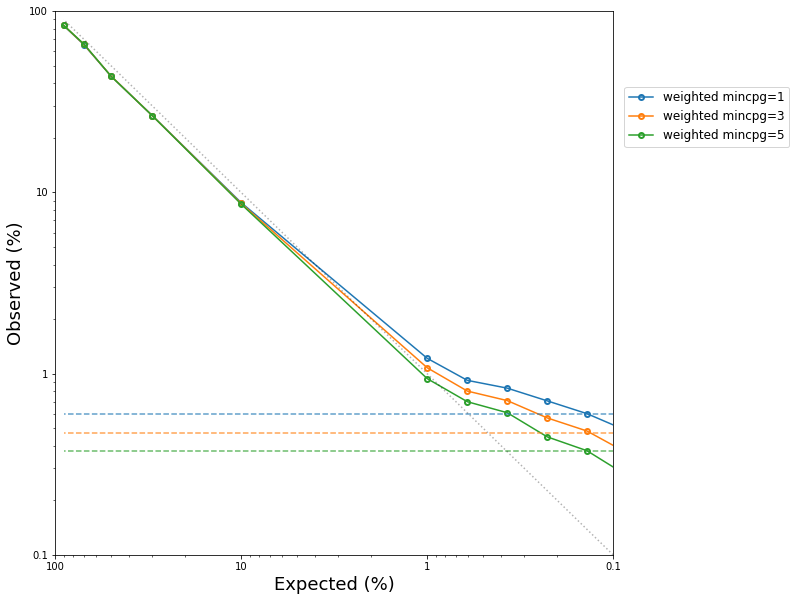

In [4]:
fig2, axs2 = plt.subplots(1, 1, figsize=(10, 10))

mincpg_lst = []


for i in range(len(infiles)):
    file_name = infiles[i]
    file = infol + '/' + file_name
    data = pd.read_csv(file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    
    file_split = file_name.split('mincpg=')
    num_mincpg = int(file_split[-1][0])
    mincpg_lst.append(num_mincpg)
    
    df_subset = df.copy()
    df_subset['Index Number'] = [int(i.split('insilmix')[-1]) for i in df_subset.index]
    df_subset.sort_values(['Index Number'], inplace=True)
    df_subset = df_subset.drop('Index Number', axis=1)
        
    idx = list(df_subset.index)[0][:-1]
    x = generate_lists(df_subset, cell_real)
    y = generate_lists(df_subset, cell)
   
    zipped_lists = zip(x, y)
    sorted_pairs = sorted(zipped_lists)

    tuples = zip(*sorted_pairs)
    x, y = [ list(tuple) for tuple in  tuples]
    
    x = np.array(x)
    y = np.array(y) * 100
    
    axs2.plot(x, y, label=infiles[i], c=color[i], marker='o', mew=2, ms=5, fillstyle='none')
    
for i in range(len(zerofiles)):
    file_name = zerofiles[i]
    file = zerofol + '/' + file_name
    data = pd.read_csv(file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    
    file_split = file_name.split('cpg')
    num_mincpg = int(file_split[-1][0])
    
    if num_mincpg in mincpg_lst:
        df_subset = df.copy()
        df_subset['Index Number'] = [int(i.split('insilmix')[-1]) for i in df_subset.index]
        df_subset.sort_values(['Index Number'], inplace=True)
        df_subset = df_subset.drop('Index Number', axis=1)
    
        y = [np.mean(np.array(df_subset[cell])) * 100] * len(x)
    
        axs2.plot(x, y, c=color[i], ls = '--', alpha=0.7)
    
axs2.plot(x, x, alpha=0.3, ls=':', c='k')
axs2.invert_xaxis()
axs2.set_xscale('log')
axs2.set_yscale('log')
axs2.set_xlabel('Expected (%)', fontsize=18)
axs2.set_ylabel('Observed (%)', fontsize=18)
axs2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
axs2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
axs2.set_xlim([100,0.1])
axs2.set_ylim([0.1,100])
axs2.legend(fontsize=12, loc=(1.02, 0.75))

In [5]:
fig2.savefig(infol+'_plot_g_zeroNeu.pdf',dpi=300, bbox_inches='tight')